## <center>Implementing a simple classification task | ML Algorithms | Logistic Regression</center>

In this notebook, I have developed a Python code for a simple classification task. Later, we have selected 2 response outputs to classify as binary.
Dataset used: https://archive.ics.uci.edu/dataset/333/forest+type+mapping

### Importing the libraries

In [1]:
#You may need to add other libraries here depending on your code

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# to display plots in Jupyter notebook
%matplotlib inline

plt.rcParams['font.size'] = '12'

### 1. Loading the data

Load the data and create your training and test datasets.

In [8]:
#Hint: Look at the function pd.read_csv()
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')
#df_train = ...
#df_test = ...
df_test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [9]:
df_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [14]:
df_train.shape

(325, 28)

In [15]:
df_test.shape

(198, 28)

### 2. Quick inspecting the data

Inspect what the columns are. Try the different options as discussed in lectures (e.g. head() and info() functions). Don't forget to use appropriate formatting in your output answers. What can you observe? Are there any issues with the data?

In [16]:
# Display information about the test dataset
print("\nInformation about the test dataset:")
print(df_test.info())


Information about the test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pre

In [17]:
column_headings = df_train.columns

#format your print, e.g.
print('Column headings are: ',column_headings)

# ... 



Column headings are:  Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')


### 3. Removing some columns from the dataset

We are going to drop all the columns *pred_minus_obs...*, i.e., we keep only the first 10 columns: the *class* column and the columns b1, b2, ..., b9. Don't forget to apply these changes to the training and test sets. 

In [22]:
#You need to create a code to remove the undesired columns from the training and testing sets. After that,
#inspect what your datasets look like. Do you have the correct data matrix structure (that is, rows represent the examples 
#and columns represent the attributes?

#...

# Drop columns starting with 'pred_minus_obs' and keep only the first 10 columns
columns_to_keep = ['class'] + [f'b{i}' for i in range(1, 10)]  # List of columns to keep

# Update training set
df_train = df_train.loc[:, columns_to_keep]

# Update test set
df_test = df_test.loc[:, columns_to_keep]
df_test

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
...,...,...,...,...,...,...,...,...,...,...
193,d,55,61,90,75,55,91,84,24,54
194,d,66,69,93,90,63,100,99,25,57
195,h,79,30,55,115,51,96,109,25,59
196,h,69,27,53,106,47,90,87,24,55


### 4. Counting the number of instances in each class

According to the UCI Machine Learning website, this dataset has 4 class labels given in the first column of the csv file: Class: *s* ('Sugi' forest), *h* ('Hinoki' forest), *d* ('Mixed deciduous' forest), *o* ('Other' non-forest land). Write Python code to count instances/examples for each class label in your datasets. Are they imbalanced? 

In [23]:
unique_classes = df_train['class'].unique()
unique_classes

array(['d', 's', 'h', 'o'], dtype=object)

In [26]:
# Total number of instances in the training dataset
total_train_instances = len(df_train)

# Total number of instances in the test dataset
total_test_instances = len(df_test)

# Count instances for each class label in the training dataset
train_class_counts = df_train['class'].value_counts()

# Count instances for each class label in the test dataset
test_class_counts = df_test['class'].value_counts()

# Calculate percentage of each class label in the training dataset
train_class_percentages = (train_class_counts / total_train_instances) * 100

# Calculate percentage of each class label in the test dataset
test_class_percentages = (test_class_counts / total_test_instances) * 100

# Create a DataFrame to store class counts and percentages
train_class_summary = pd.DataFrame({
    'Count': train_class_counts,
    'Percentage': train_class_percentages
})

test_class_summary = pd.DataFrame({
    'Count': test_class_counts,
    'Percentage': test_class_percentages
})

# Print class counts and percentages for the training dataset
print("Class counts and percentages in the training dataset:")
print(train_class_summary)

# Print class counts and percentages for the test dataset
print("\nClass counts and percentages in the test dataset:")
print(test_class_summary)


Class counts and percentages in the training dataset:
       Count  Percentage
class                   
s        136   41.846154
d        105   32.307692
o         46   14.153846
h         38   11.692308

Class counts and percentages in the test dataset:
       Count  Percentage
class                   
s         59   29.797980
d         54   27.272727
h         48   24.242424
o         37   18.686869


### 5. Doing some data visualisation 

Use appropriate functions to display (visualise) the different features (attributes/columns). You can also incorporate class information. Do you observe any aspect of the data that should be addressed?

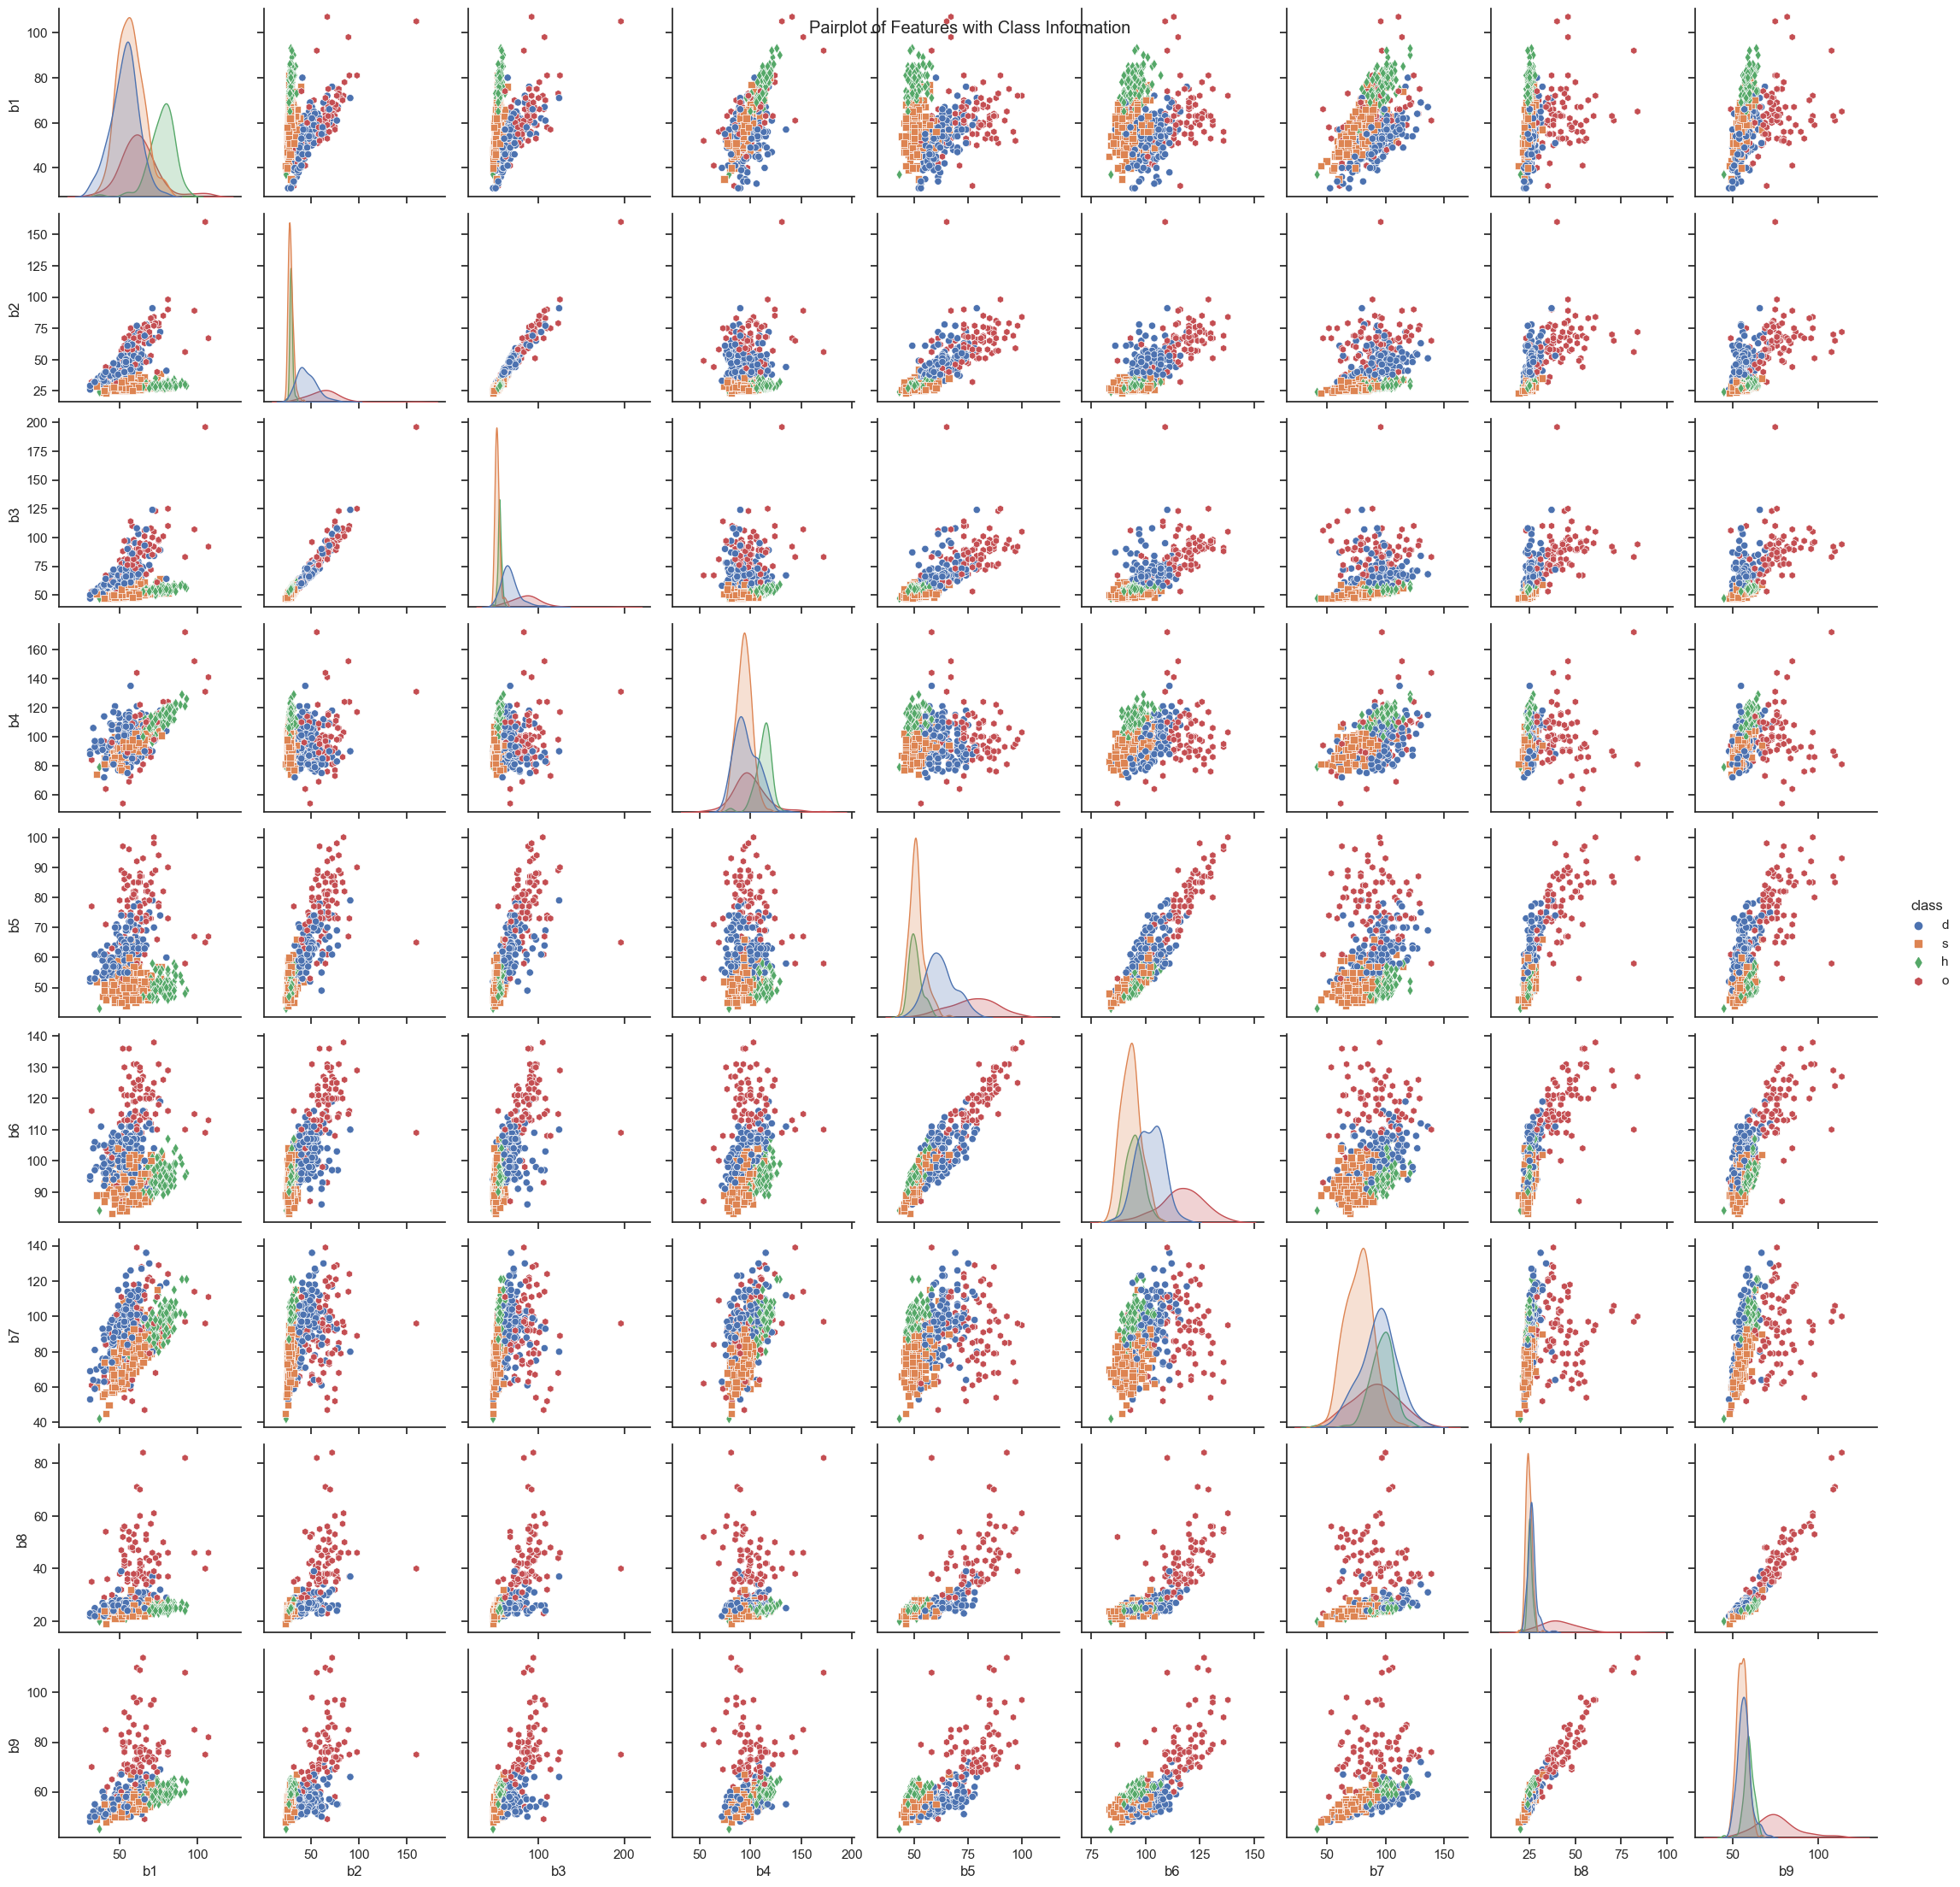

In [33]:
# Tip: explore different options, like histograms, scatter plots, etc. Check out how to make some nice plots with the seaborn package.
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Set style for seaborn plots
sns.set(style="ticks")

# Concatenate the training and test datasets for visualization
df_concat = pd.concat([df_train, df_test])

# Visualize features using pairplot
sns.pairplot(df_concat, hue='class', markers=['o', 's', 'd', 'h'])

# Add title
plt.suptitle('Pairplot of Features with Class Information')

# Show plot
plt.show()

#...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

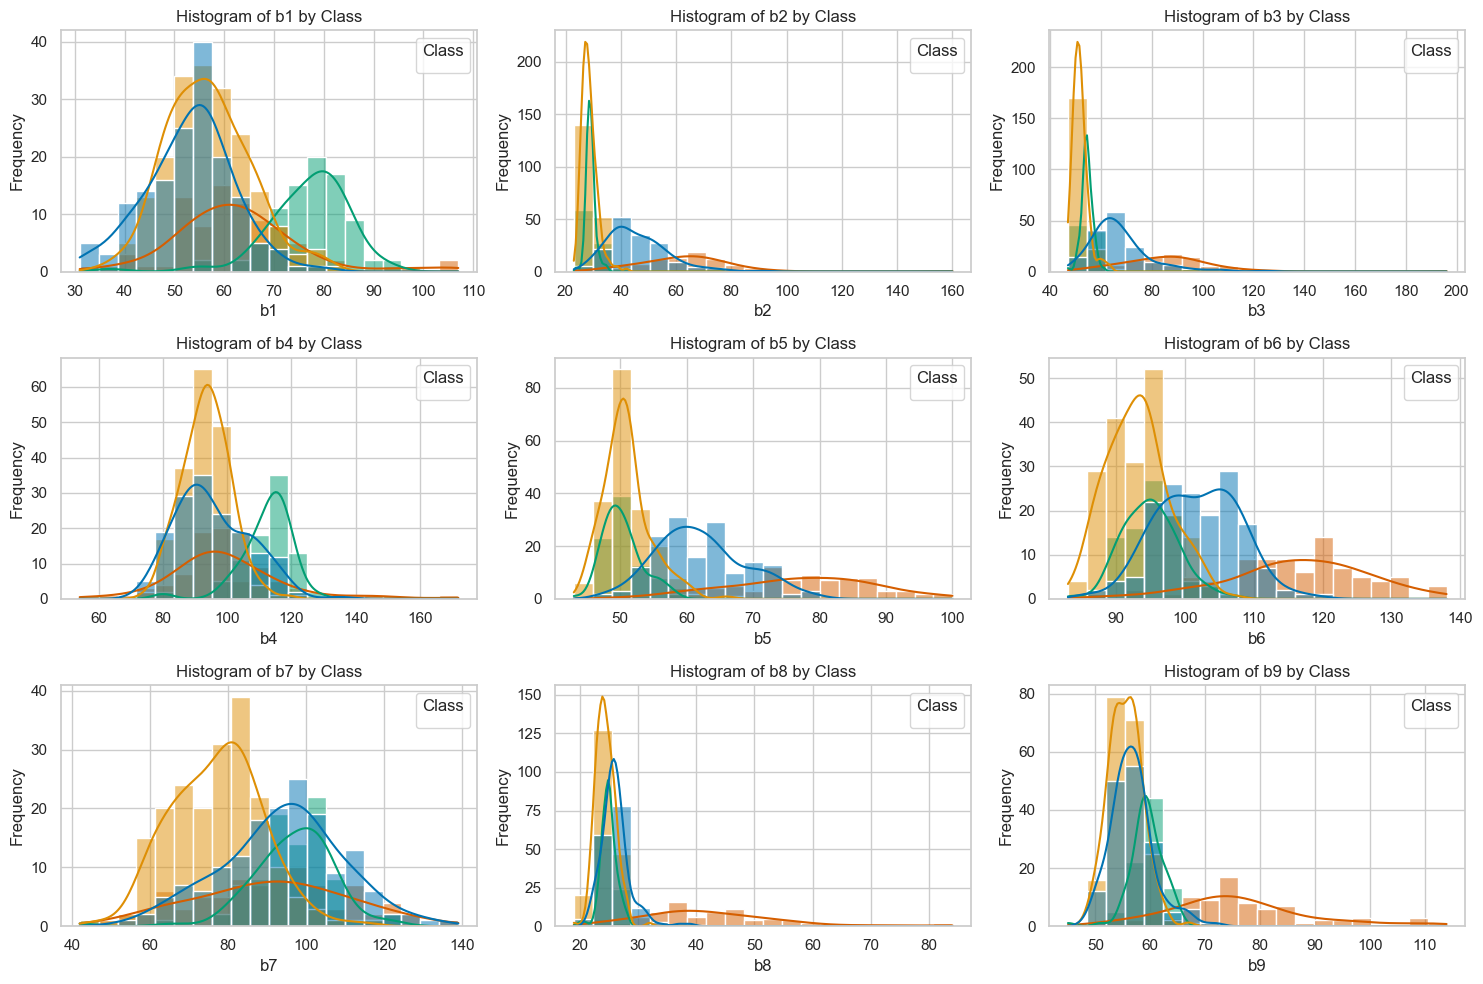

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set style for seaborn plots
sns.set(style="whitegrid")

# Concatenate the training and test datasets for visualization
df_concat = pd.concat([df_train, df_test])

# Determine the number of rows and columns for subplots
num_features = len(df_concat.columns[1:])  # Exclude the 'class' column
num_rows = int(math.ceil(num_features / 3))  # Number of rows
num_cols = min(3, num_features)  # Number of columns (maximum 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes if necessary
if num_rows == 1 and num_cols == 1:
    axes = [axes]

# Visualize individual features with histograms in a 3x3 grid
for i, column in enumerate(df_concat.columns[1:]):  # Exclude the 'class' column
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=df_concat, x=column, hue='class', kde=True, bins=20, palette='colorblind', ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column} by Class')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend(title='Class')

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [36]:
# To check the correlation between the feature variables b1:b9

# Exclude non-numeric columns like 'class'
numeric_df_concat = df_concat.drop(columns=['class'])

# Calculate the correlation matrix
correlation_matrix = numeric_df_concat.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
          b1        b2        b3        b4        b5        b6        b7  \
b1  1.000000  0.147235  0.210050  0.680807 -0.010048  0.084474  0.501744   
b2  0.147235  1.000000  0.976885  0.047975  0.823004  0.743003  0.337039   
b3  0.210050  0.976885  1.000000  0.063333  0.774261  0.703245  0.283265   
b4  0.680807  0.047975  0.063333  1.000000 -0.049375  0.212992  0.520918   
b5 -0.010048  0.823004  0.774261 -0.049375  1.000000  0.920204  0.288485   
b6  0.084474  0.743003  0.703245  0.212992  0.920204  1.000000  0.327262   
b7  0.501744  0.337039  0.283265  0.520918  0.288485  0.327262  1.000000   
b8  0.176294  0.664112  0.661297  0.085795  0.741538  0.756629  0.174570   
b9  0.340786  0.618832  0.621994  0.228343  0.692828  0.751658  0.337594   

          b8        b9  
b1  0.176294  0.340786  
b2  0.664112  0.618832  
b3  0.661297  0.621994  
b4  0.085795  0.228343  
b5  0.741538  0.692828  
b6  0.756629  0.751658  
b7  0.174570  0.337594  
b8  1.000000  0.949

### 6. Preparing the data for a binary classification

We will do a multiclass classification on this dataset later. For now, we will start with a binary classification. Update your training and testing sets to contain only examples from two classes: "s" ("Sugi" forest) and  "d" ("Mixed deciduous" forest).

In [37]:
# Filter training set to contain only examples from classes "s" and "d"
binary_train = df_train[(df_train['class'] == 's') | (df_train['class'] == 'd')]

# Filter testing set to contain only examples from classes "s" and "d"
binary_test = df_test[(df_test['class'] == 's') | (df_test['class'] == 'd')]

### 7. Using the Logistic Regression

Use the **Logistic Regression Classifier** implemented in **sklearn.linear\_model** class to perform a binary classification on the updated datasets. Try also to implement your version of the Logistic Regression (do you arrive at similar results as the package?). Implementing your version is the best way to learn. 

In [45]:
# OPTION1: USING Logistic Regression classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Prepare the data
X_train = binary_train.drop(columns=['class'])
y_train = binary_train['class']
X_test = binary_test.drop(columns=['class'])
y_test = binary_test['class']

# Fit the classifier to the training data
lr_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Classifier Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Logistic Regression Classifier Results:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           d       0.98      1.00      0.99        54
           s       1.00      0.98      0.99        59

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



In [40]:
# OPTION 2: My Version of Logistic Regression

import numpy as np

y_train_numerical = y_train.replace({'s': 0, 'd': 1})
y_test_numerical = y_test.replace({'s': 0, 'd': 1})

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.num_iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Sigmoid activation
            y_pred = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

# Instantiate and train the custom Logistic Regression classifier
my_lr_classifier = MyLogisticRegression()
my_lr_classifier.fit(X_train.values, y_train_numerical.values)

# Predict using the custom Logistic Regression classifier
y_pred_custom = my_lr_classifier.predict(X_test.values)

# Evaluate the custom Logistic Regression classifier
accuracy_custom = accuracy_score(y_test_numerical, y_pred_custom)
report_custom = classification_report(y_test_numerical, y_pred_custom)

print("Custom Logistic Regression Classifier Results:")
print(f"Accuracy: {accuracy_custom:.2f}")
print("Classification Report:")
print(report_custom)


Custom Logistic Regression Classifier Results:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        54

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



### 8. Inspecting performance indicators

Write Python code to show results for: 

- The accuracy values for the training set and the test set.
- The confusion matrix on the training and testing set.  
- The plot of precision versus recall for the training set.

Make sure you format the output properly. 

In [44]:
##

### 9. Plotting the estimated probabilities and decision boundary of the Logistic Regression model. 

Consider two individual features in our dataset. We will use them to examine the estimated probabilities and decision boundary of the Logistic Regression model. You can choose which ones and/or experiment with different pairs of features. For each pair, you should create a new version of your training set using these two features only.

Also, to plot the Logistic Regression Classifier's estimated probabilities and decision boundary (as in Figure 4.23 of the textbook), considering these two individual features, you will need to create a Logistic Regression model for each feature. Hence, you are to provide two plots.

In [ ]:
# ...

Based on your plots, comment about: 

- What threshold would you choose for classification based on the predicted probabilities?
- What is the impact of changing the threshold for performance indicators such as precision and recall?
- What can you say about the overlap between classes, and how does this impact classification performance?